##### **Problem Statement:**

In today's rapidly advancing healthcare landscape, there is a critical need for innovative approaches to early detection of health risks and disease conditions to enhance patient care and outcomes. This project presents an integrated, innovative solution by combining three distinct datasets: human vital signs, sleep efficiency, and physical activity tracking details. Each dataset provides essential health parameters such as heart rate, sleep metrics, and activity levels, which are combined into a cohesive 30-day time series for each individual, offering a comprehensive and holistic view of their health status.

The goal of this project is to leverage Long Short-Term Memory (LSTM) networks for unsupervised anomaly detection by utilizing Mean Squared Error (MSE) thresholds to identify atypical health patterns that may indicate emerging health concerns. Unlike conventional approaches, this project is inspired by an original methodology that harnesses the power of LSTM for anomaly detection and subsequently uses these insights to inform downstream health predictions. Anomalies detected by LSTM are used to create derived features, which are then employed in a Random Forest classifier to predict potential health outcomes, including early signs of disease, workout effectiveness, and indicators of hypertension.

A key innovation of this project is its ability to account for the temporal dynamics of health metrics, focusing on sustained changes rather than isolated spikes. The model aggregates health indicators over a 5-day rolling window, ensuring that predictions are based on consistent trends rather than transient fluctuations. This approach addresses a significant gap in current health monitoring systems that often fail to distinguish between momentary anomalies and true health risks.

What sets this project apart is its comprehensive, multi-step methodology: from using LSTM networks for unsupervised anomaly detection to creating enriched features for disease risk prediction with classical machine learning models. This combination results in a robust, data-driven framework for personalized healthcare, empowering individuals and healthcare providers to take proactive steps in maintaining health and preventing disease.

#### Dataset of Human Vital Signs: "https://www.kaggle.com/datasets/nasirayub2/human-vital-sign-dataset/data" (2024 dataset)
#### Dataset of Sleep Efficiency: "https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency/data"
#### Dataset of Tracking Details: "https://www.kaggle.com/datasets/elijahtoumoua/bellabeat"


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [56]:
vitals=pd.read_csv("C://Users//saipr//OneDrive//Documents//M TECH NITW//MLSP Project//human_vital_signs_dataset_2024.csv")
vitals

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,60,12,2024-07-19 21:53:45.729841,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,0.121033,38,32.459031,98.666667,High Risk
1,2,63,18,2024-07-19 21:52:45.729841,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,0.117062,42,12.771246,98.000000,High Risk
2,3,63,15,2024-07-19 21:51:45.729841,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,0.053200,53,28.821069,95.666667,Low Risk
3,4,99,16,2024-07-19 21:50:45.729841,36.654748,95.011801,118,72,41,Female,96.006188,1.833629,0.064475,46,28.554611,87.333333,High Risk
4,5,69,16,2024-07-19 21:49:45.729841,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,0.118484,62,16.081438,96.666667,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200015,200016,87,17,2024-03-03 00:18:46.246950,37.058905,95.357470,120,84,75,Male,63.496314,1.848268,0.129698,36,18.587394,96.000000,Low Risk
200016,200017,76,16,2024-03-03 00:17:46.246950,36.463631,99.340786,131,89,76,Male,99.384322,1.988074,0.061232,42,25.145064,103.000000,Low Risk
200017,200018,81,13,2024-03-03 00:16:46.246950,36.665477,98.120530,124,89,18,Female,71.771830,1.918059,0.097381,35,19.508780,100.666667,Low Risk
200018,200019,83,13,2024-03-03 00:15:46.246950,37.019873,95.362426,125,86,66,Female,60.220388,1.861655,0.068300,39,17.375810,99.000000,High Risk


#### Considering only Elder Patients:

In [57]:
vitals.query("Age>55").shape[0]

94202

In [58]:
vitals_drop=vitals[vitals['Age']>55]
vitals_drop=vitals_drop.reset_index(drop=True)
vitals_drop

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,2,63,18,2024-07-19 21:52:45.729841,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,0.117062,42,12.771246,98.000000,High Risk
1,3,63,15,2024-07-19 21:51:45.729841,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,0.053200,53,28.821069,95.666667,Low Risk
2,8,96,15,2024-07-19 21:46:45.729841,36.852633,97.124125,135,77,72,Female,71.758972,1.603888,0.073413,58,27.895118,96.333333,High Risk
3,10,66,15,2024-07-19 21:44:45.729841,36.957178,97.916267,131,77,61,Male,53.923400,1.896381,0.081364,54,14.994299,95.000000,High Risk
4,12,84,12,2024-07-19 21:42:45.729841,36.531788,97.997401,137,83,78,Female,99.314114,1.822397,0.101625,54,29.903692,101.000000,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94197,200013,99,19,2024-03-03 00:21:46.246950,36.395335,98.914781,136,70,72,Male,56.789551,1.737105,0.102772,66,18.819851,92.000000,High Risk
94198,200016,87,17,2024-03-03 00:18:46.246950,37.058905,95.357470,120,84,75,Male,63.496314,1.848268,0.129698,36,18.587394,96.000000,Low Risk
94199,200017,76,16,2024-03-03 00:17:46.246950,36.463631,99.340786,131,89,76,Male,99.384322,1.988074,0.061232,42,25.145064,103.000000,Low Risk
94200,200019,83,13,2024-03-03 00:15:46.246950,37.019873,95.362426,125,86,66,Female,60.220388,1.861655,0.068300,39,17.375810,99.000000,High Risk


#### FIltering Out and Analyzing the available parameters:

In [59]:
temp=vitals_drop['Age'].unique()
print(np.sort(temp))

[56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79
 80 81 82 83 84 85 86 87 88 89]


In [60]:
vitals_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94202 entries, 0 to 94201
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                94202 non-null  int64  
 1   Heart Rate                94202 non-null  int64  
 2   Respiratory Rate          94202 non-null  int64  
 3   Timestamp                 94202 non-null  object 
 4   Body Temperature          94202 non-null  float64
 5   Oxygen Saturation         94202 non-null  float64
 6   Systolic Blood Pressure   94202 non-null  int64  
 7   Diastolic Blood Pressure  94202 non-null  int64  
 8   Age                       94202 non-null  int64  
 9   Gender                    94202 non-null  object 
 10  Weight (kg)               94202 non-null  float64
 11  Height (m)                94202 non-null  float64
 12  Derived_HRV               94202 non-null  float64
 13  Derived_Pulse_Pressure    94202 non-null  int64  
 14  Derive

In [61]:
print(vitals.memory_usage(deep=True)/(1024**2))

Index                        0.000126
Patient ID                   1.526031
Heart Rate                   1.526031
Respiratory Rate             1.526031
Timestamp                   14.306545
Body Temperature             1.526031
Oxygen Saturation            1.526031
Systolic Blood Pressure      1.526031
Diastolic Blood Pressure     1.526031
Age                          1.526031
Gender                      10.300917
Weight (kg)                  1.526031
Height (m)                   1.526031
Derived_HRV                  1.526031
Derived_Pulse_Pressure       1.526031
Derived_BMI                  1.526031
Derived_MAP                  1.526031
Risk Category               10.973220
dtype: float64


<Axes: >

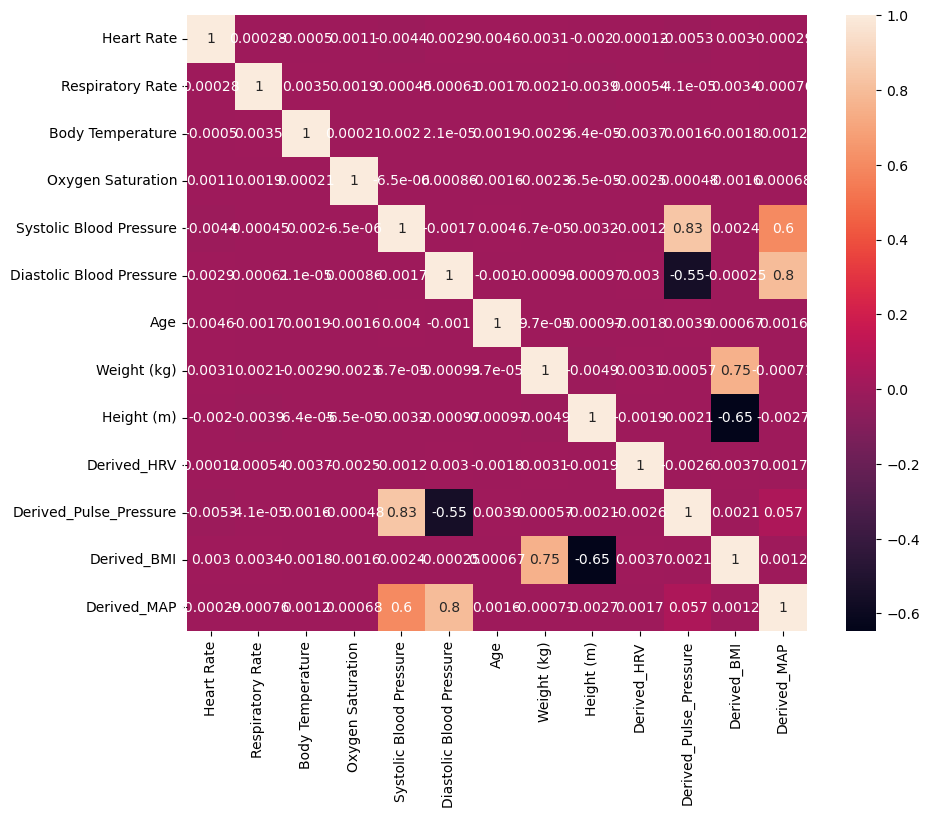

In [62]:
plt.figure(figsize=(10,8))
X_train=vitals[['Heart Rate','Respiratory Rate','Body Temperature','Oxygen Saturation','Systolic Blood Pressure','Diastolic Blood Pressure','Age','Weight (kg)','Height (m)', 'Derived_HRV','Derived_Pulse_Pressure'
               ,'Derived_BMI','Derived_MAP']]
sns.heatmap(X_train.corr(),annot=True)

### ===========Sleep Efficiency==========

In [64]:
sleep_eff=pd.read_csv("C://Users//saipr//OneDrive//Documents//M TECH NITW//MLSP Project//Sleep_Efficiency.csv")
sleep_eff.head(5)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,06-03-2021 01:00,06-03-2021 07:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,05-12-2021 02:00,05-12-2021 09:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,25-05-2021 21:30,25-05-2021 05:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,03-11-2021 02:30,03-11-2021 08:30,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,13-03-2021 01:00,13-03-2021 09:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [65]:
sleep_eff=sleep_eff[sleep_eff['Age']>55]
sleep_eff=sleep_eff.reset_index(drop=True)
sleep_eff.head(5)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,06-03-2021 01:00,06-03-2021 07:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,05-12-2021 02:00,05-12-2021 09:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,5,57,Male,13-03-2021 01:00,13-03-2021 09:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
3,24,63,Female,21-05-2021 02:30,21-05-2021 10:30,8.0,0.98,22,65,13,0.0,50.0,0.0,No,1.0
4,36,61,Female,19-10-2021 01:00,19-10-2021 08:00,7.0,0.64,23,22,55,2.0,50.0,3.0,No,0.0


#### ====== Merged two datasets ========

In [66]:
data_set=pd.merge(vitals_drop,sleep_eff,on=['Age','Gender'],how='outer')
data_set=data_set.drop(columns=['ID'])

In [67]:
print(data_set['Age'].unique())

[56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79
 80 81 82 83 84 85 86 87 88 89]


In [68]:
for i in data_set.columns:
    if(data_set[i].isnull().sum()!=0):
        if data_set[i].dtype in ["int64", "float64"]:
            data_set[i] = data_set[i].interpolate(method='linear')
            print("data_set[{}] done using interpolate".format(i))
        elif(data_set[i].isnull().sum()!=0 and (data_set[i].dtype=="O")):
            data_set[i]=data_set[i].ffill()
            print("data_set[{}] done using backfill".format(i))
    else:
        print("data_set[{}] No changes".format(i))

data_set[Patient ID] No changes
data_set[Heart Rate] No changes
data_set[Respiratory Rate] No changes
data_set[Timestamp] No changes
data_set[Body Temperature] No changes
data_set[Oxygen Saturation] No changes
data_set[Systolic Blood Pressure] No changes
data_set[Diastolic Blood Pressure] No changes
data_set[Age] No changes
data_set[Gender] No changes
data_set[Weight (kg)] No changes
data_set[Height (m)] No changes
data_set[Derived_HRV] No changes
data_set[Derived_Pulse_Pressure] No changes
data_set[Derived_BMI] No changes
data_set[Derived_MAP] No changes
data_set[Risk Category] No changes
data_set[Bedtime] done using backfill
data_set[Wakeup time] done using backfill
data_set[Sleep duration] done using interpolate
data_set[Sleep efficiency] done using interpolate
data_set[REM sleep percentage] done using interpolate
data_set[Deep sleep percentage] done using interpolate
data_set[Light sleep percentage] done using interpolate
data_set[Awakenings] done using interpolate
data_set[Caffein

In [69]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148069 entries, 0 to 148068
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient ID                148069 non-null  int64  
 1   Heart Rate                148069 non-null  int64  
 2   Respiratory Rate          148069 non-null  int64  
 3   Timestamp                 148069 non-null  object 
 4   Body Temperature          148069 non-null  float64
 5   Oxygen Saturation         148069 non-null  float64
 6   Systolic Blood Pressure   148069 non-null  int64  
 7   Diastolic Blood Pressure  148069 non-null  int64  
 8   Age                       148069 non-null  int64  
 9   Gender                    148069 non-null  object 
 10  Weight (kg)               148069 non-null  float64
 11  Height (m)                148069 non-null  float64
 12  Derived_HRV               148069 non-null  float64
 13  Derived_Pulse_Pressure    148069 non-null  i

In [70]:
data_set.isnull().sum()

Patient ID                  0
Heart Rate                  0
Respiratory Rate            0
Timestamp                   0
Body Temperature            0
Oxygen Saturation           0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
Age                         0
Gender                      0
Weight (kg)                 0
Height (m)                  0
Derived_HRV                 0
Derived_Pulse_Pressure      0
Derived_BMI                 0
Derived_MAP                 0
Risk Category               0
Bedtime                     0
Wakeup time                 0
Sleep duration              0
Sleep efficiency            0
REM sleep percentage        0
Deep sleep percentage       0
Light sleep percentage      0
Awakenings                  0
Caffeine consumption        0
Alcohol consumption         0
Smoking status              0
Exercise frequency          0
dtype: int64

In [71]:
data_set.sort_values(by=["Patient ID"],ascending=True)
data_set['Patient ID']=range(1,len(data_set)+1)
data_set

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,...,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,95,17,2024-07-19 20:33:45.729841,36.550568,97.869534,113,78,56,Female,...,7.0,0.96,28.0,52.0,20.0,1.0,50.0,0.0,No,0.0
1,2,95,17,2024-07-19 20:33:45.729841,36.550568,97.869534,113,78,56,Female,...,7.0,0.93,20.0,65.0,15.0,1.0,0.0,5.0,No,3.0
2,3,95,17,2024-07-19 20:33:45.729841,36.550568,97.869534,113,78,56,Female,...,9.0,0.53,24.0,25.0,51.0,2.0,25.0,4.0,Yes,0.0
3,4,95,12,2024-07-19 16:36:45.730842,36.164482,98.782989,138,70,56,Female,...,7.0,0.96,28.0,52.0,20.0,1.0,50.0,0.0,No,0.0
4,5,95,12,2024-07-19 16:36:45.730842,36.164482,98.782989,138,70,56,Female,...,7.0,0.93,20.0,65.0,15.0,1.0,0.0,5.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148064,148065,74,15,2024-03-03 13:25:46.244949,36.502691,98.860335,116,79,89,Male,...,7.0,0.66,19.0,28.0,53.0,3.0,0.0,3.0,Yes,3.0
148065,148066,89,13,2024-03-03 07:37:46.244949,37.116896,95.395270,112,80,89,Male,...,7.0,0.66,19.0,28.0,53.0,3.0,0.0,3.0,Yes,3.0
148066,148067,81,18,2024-03-03 05:17:46.245949,36.979364,96.999470,129,84,89,Male,...,7.0,0.66,19.0,28.0,53.0,3.0,0.0,3.0,Yes,3.0
148067,148068,68,17,2024-03-03 03:20:46.245949,37.398712,98.854262,139,70,89,Male,...,7.0,0.66,19.0,28.0,53.0,3.0,0.0,3.0,Yes,3.0


## +++++ completed one half ++++++

In [73]:
activity=pd.read_csv("C://Users//saipr//OneDrive//Documents//M TECH NITW//MLSP Project//dailyActivity_merged.csv")
activity.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,04-12-2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [74]:
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'],format='mixed')

In [75]:
most_recent_dates = activity.groupby('Id')['ActivityDate'].max().reset_index()
most_recent_dates.columns = ['Id', 'Current_Date']
activity = pd.merge(activity, most_recent_dates, on='Id')

In [76]:
activity.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Current_Date
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-05-12
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-05-12
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,2016-05-12
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-05-12
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-05-12


In [77]:
activity['Day_Difference']=(activity['Current_Date']-activity['ActivityDate']).dt.days
activity['Day_label']=30-activity['Day_Difference']
activity=activity.drop(columns=["ActivityDate","Current_Date","Day_Difference"])
activity.head(7)

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_label
0,1503960366,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0
1,1503960366,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1
2,1503960366,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,2
3,1503960366,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,3
4,1503960366,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,4
5,1503960366,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,5
6,1503960366,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,6


<Axes: >

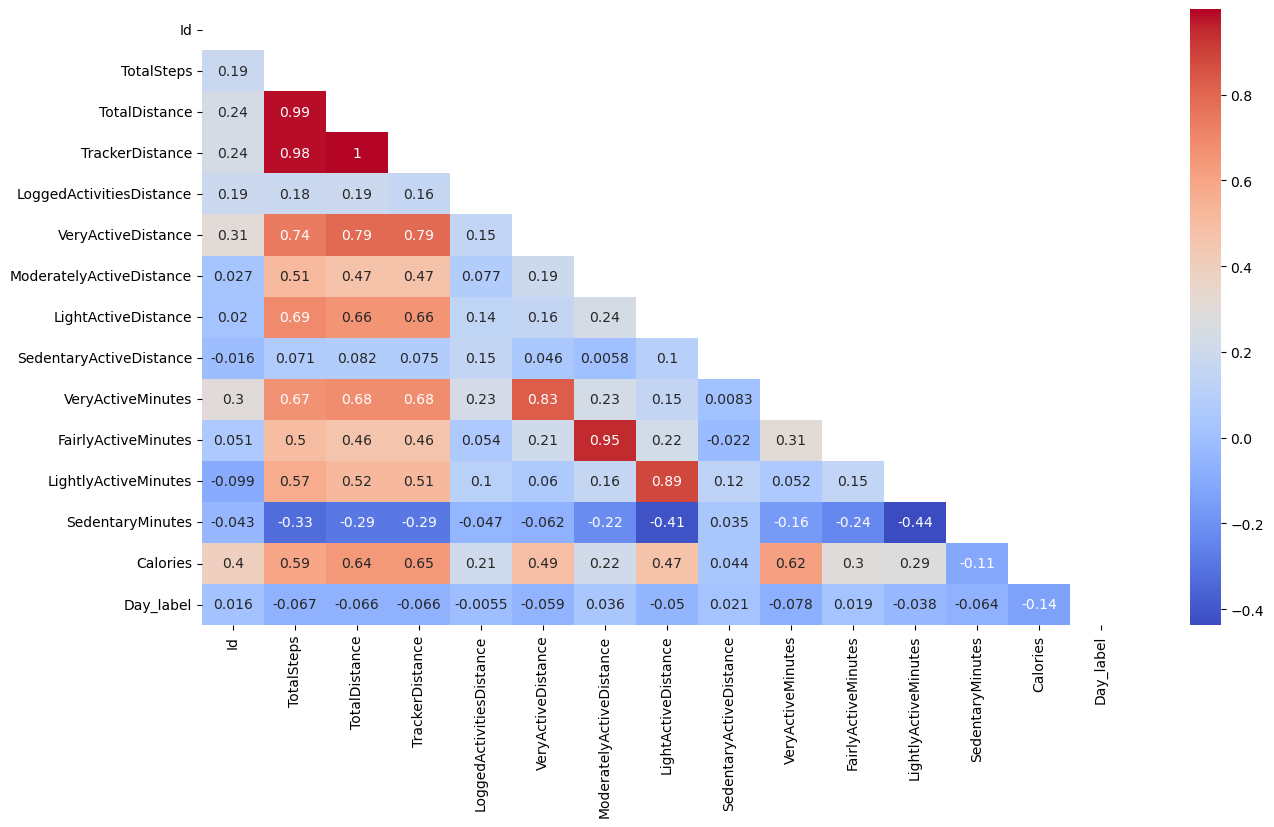

In [78]:
mask = np.triu(np.ones_like(activity.corr(), dtype=bool))
plt.figure(figsize=(15,8))
sns.heatmap(activity.corr(),annot=True,cmap='coolwarm',mask=mask,xticklabels=True,yticklabels=True)

In [79]:
activities_30days=activity[['Day_label','Calories','TrackerDistance','TotalSteps']].astype("int16")
activities_30days['Id']=activity[['Id']]

In [80]:
activities_30days

,Day_label,Calories,TrackerDistance,TotalSteps,Id
0,0,1985,8,13162,1503960366
1,1,1797,6,10735,1503960366
2,2,1776,6,10460,1503960366
3,3,1745,6,9762,1503960366
4,4,1863,8,12669,1503960366
...,...,...,...,...,...
935,26,2847,8,10686,8877689391
936,27,3710,18,20226,8877689391
937,28,2832,8,10733,8877689391
938,29,3832,19,21420,8877689391


In [81]:
patient_counts = []
for i in np.sort(activities_30days['Id'].unique()):
    temp=activities_30days[activities_30days['Id']==i]
    temp = temp.sort_values(by='Day_label', ascending=True)
    count=len(temp)
    patient_counts.append({'Patient ID': i, 'Count': count})
patient_counts

[{'Patient ID': 1503960366, 'Count': 31},
 {'Patient ID': 1624580081, 'Count': 31},
 {'Patient ID': 1644430081, 'Count': 30},
 {'Patient ID': 1844505072, 'Count': 31},
 {'Patient ID': 1927972279, 'Count': 31},
 {'Patient ID': 2022484408, 'Count': 31},
 {'Patient ID': 2026352035, 'Count': 31},
 {'Patient ID': 2320127002, 'Count': 31},
 {'Patient ID': 2347167796, 'Count': 18},
 {'Patient ID': 2873212765, 'Count': 31},
 {'Patient ID': 3372868164, 'Count': 20},
 {'Patient ID': 3977333714, 'Count': 30},
 {'Patient ID': 4020332650, 'Count': 31},
 {'Patient ID': 4057192912, 'Count': 4},
 {'Patient ID': 4319703577, 'Count': 31},
 {'Patient ID': 4388161847, 'Count': 31},
 {'Patient ID': 4445114986, 'Count': 31},
 {'Patient ID': 4558609924, 'Count': 31},
 {'Patient ID': 4702921684, 'Count': 31},
 {'Patient ID': 5553957443, 'Count': 31},
 {'Patient ID': 5577150313, 'Count': 30},
 {'Patient ID': 6117666160, 'Count': 28},
 {'Patient ID': 6290855005, 'Count': 29},
 {'Patient ID': 6775888955, 'Count'

In [82]:
activities_30days.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Day_label        940 non-null    int16
 1   Calories         940 non-null    int16
 2   TrackerDistance  940 non-null    int16
 3   TotalSteps       940 non-null    int16
 4   Id               940 non-null    int64
dtypes: int16(4), int64(1)
memory usage: 14.8 KB


#### Converting the type to reduced format to reduce computations

In [84]:
for i in data_set.columns:
    if(data_set[i].dtype=="int64" and i!="Patient ID"):
        data_set[i]=data_set[i].astype("int16")
    elif(data_set[i].dtype=="float64"):
        data_set[i]=data_set[i].astype("float32")
    else:
        print("data_set[{}] is a {}".format(i,data_set[i].dtype))


data_set[Patient ID] is a int64
data_set[Timestamp] is a object
data_set[Gender] is a object
data_set[Risk Category] is a object
data_set[Bedtime] is a object
data_set[Wakeup time] is a object
data_set[Smoking status] is a object


In [85]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148069 entries, 0 to 148068
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient ID                148069 non-null  int64  
 1   Heart Rate                148069 non-null  int16  
 2   Respiratory Rate          148069 non-null  int16  
 3   Timestamp                 148069 non-null  object 
 4   Body Temperature          148069 non-null  float32
 5   Oxygen Saturation         148069 non-null  float32
 6   Systolic Blood Pressure   148069 non-null  int16  
 7   Diastolic Blood Pressure  148069 non-null  int16  
 8   Age                       148069 non-null  int16  
 9   Gender                    148069 non-null  object 
 10  Weight (kg)               148069 non-null  float32
 11  Height (m)                148069 non-null  float32
 12  Derived_HRV               148069 non-null  float32
 13  Derived_Pulse_Pressure    148069 non-null  i

In [86]:
activities_30days['Id']

0      1503960366
1      1503960366
2      1503960366
3      1503960366
4      1503960366
          ...    
935    8877689391
936    8877689391
937    8877689391
938    8877689391
939    8877689391
Name: Id, Length: 940, dtype: int64

In [87]:
# Randomly sample one tracking record for each patient
data_set['Assigned_Tracking_ID'] = np.random.choice(activities_30days['Id'], size=len(data_set), replace=True)

# Now, you can merge or assign the tracking data to the patients based on this random assignment
#data = pd.merge(data_set,activities_30days, left_on='Assigned_Tracking_ID', right_on='Id', how='left')

# Step 3: Dropping unnecessary columns after merge (optional)
#data = data.drop(columns=['Assigned_Tracking_ID', 'Id'])
data_set.sort_values(by=["Patient ID"],ascending=True)
data_set.head()

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,...,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Assigned_Tracking_ID
0,1,95,17,2024-07-19 20:33:45.729841,36.550568,97.869537,113,78,56,Female,...,0.96,28.0,52.0,20.0,1.0,50.0,0.0,No,0.0,7007744171
1,2,95,17,2024-07-19 20:33:45.729841,36.550568,97.869537,113,78,56,Female,...,0.93,20.0,65.0,15.0,1.0,0.0,5.0,No,3.0,4558609924
2,3,95,17,2024-07-19 20:33:45.729841,36.550568,97.869537,113,78,56,Female,...,0.53,24.0,25.0,51.0,2.0,25.0,4.0,Yes,0.0,8053475328
3,4,95,12,2024-07-19 16:36:45.730842,36.164482,98.782990,138,70,56,Female,...,0.96,28.0,52.0,20.0,1.0,50.0,0.0,No,0.0,2022484408
4,5,95,12,2024-07-19 16:36:45.730842,36.164482,98.782990,138,70,56,Female,...,0.93,20.0,65.0,15.0,1.0,0.0,5.0,No,3.0,8877689391


In [88]:
# Now, you can merge or assign the tracking data to the patients based on this random assignment
data = pd.merge(data_set,activities_30days, left_on='Assigned_Tracking_ID', right_on='Id', how='left')
data.sort_values(by=["Patient ID"],ascending=True)
data

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,...,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Assigned_Tracking_ID,Day_label,Calories,TrackerDistance,TotalSteps,Id
0,1,95,17,2024-07-19 20:33:45.729841,36.550568,97.869537,113,78,56,Female,...,50.0,0.0,No,0.0,7007744171,5,2937,9,14172,7007744171
1,1,95,17,2024-07-19 20:33:45.729841,36.550568,97.869537,113,78,56,Female,...,50.0,0.0,No,0.0,7007744171,6,2742,8,12862,7007744171
2,1,95,17,2024-07-19 20:33:45.729841,36.550568,97.869537,113,78,56,Female,...,50.0,0.0,No,0.0,7007744171,7,2668,7,11179,7007744171
3,1,95,17,2024-07-19 20:33:45.729841,36.550568,97.869537,113,78,56,Female,...,50.0,0.0,No,0.0,7007744171,8,2098,3,5273,7007744171
4,1,95,17,2024-07-19 20:33:45.729841,36.550568,97.869537,113,78,56,Female,...,50.0,0.0,No,0.0,7007744171,9,2076,3,4631,7007744171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378193,148069,93,13,2024-03-03 01:42:46.245949,36.025597,98.725372,127,79,89,Male,...,0.0,3.0,Yes,3.0,6962181067,26,1659,2,4188,6962181067
4378194,148069,93,13,2024-03-03 01:42:46.245949,36.025597,98.725372,127,79,89,Male,...,0.0,3.0,Yes,3.0,6962181067,27,2105,8,12342,6962181067
4378195,148069,93,13,2024-03-03 01:42:46.245949,36.025597,98.725372,127,79,89,Male,...,0.0,3.0,Yes,3.0,6962181067,28,2361,10,15448,6962181067
4378196,148069,93,13,2024-03-03 01:42:46.245949,36.025597,98.725372,127,79,89,Male,...,0.0,3.0,Yes,3.0,6962181067,29,1855,4,6722,6962181067


In [89]:
# Step 3: Dropping unnecessary columns after merge (optional)
data = data.drop(columns=['Assigned_Tracking_ID', 'Id'])
data_set.sort_values(by=["Patient ID"],ascending=True)
data_set

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,...,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Assigned_Tracking_ID
0,1,95,17,2024-07-19 20:33:45.729841,36.550568,97.869537,113,78,56,Female,...,0.96,28.0,52.0,20.0,1.0,50.0,0.0,No,0.0,7007744171
1,2,95,17,2024-07-19 20:33:45.729841,36.550568,97.869537,113,78,56,Female,...,0.93,20.0,65.0,15.0,1.0,0.0,5.0,No,3.0,4558609924
2,3,95,17,2024-07-19 20:33:45.729841,36.550568,97.869537,113,78,56,Female,...,0.53,24.0,25.0,51.0,2.0,25.0,4.0,Yes,0.0,8053475328
3,4,95,12,2024-07-19 16:36:45.730842,36.164482,98.782990,138,70,56,Female,...,0.96,28.0,52.0,20.0,1.0,50.0,0.0,No,0.0,2022484408
4,5,95,12,2024-07-19 16:36:45.730842,36.164482,98.782990,138,70,56,Female,...,0.93,20.0,65.0,15.0,1.0,0.0,5.0,No,3.0,8877689391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148064,148065,74,15,2024-03-03 13:25:46.244949,36.502689,98.860336,116,79,89,Male,...,0.66,19.0,28.0,53.0,3.0,0.0,3.0,Yes,3.0,4020332650
148065,148066,89,13,2024-03-03 07:37:46.244949,37.116898,95.395271,112,80,89,Male,...,0.66,19.0,28.0,53.0,3.0,0.0,3.0,Yes,3.0,2026352035
148066,148067,81,18,2024-03-03 05:17:46.245949,36.979362,96.999466,129,84,89,Male,...,0.66,19.0,28.0,53.0,3.0,0.0,3.0,Yes,3.0,2873212765
148067,148068,68,17,2024-03-03 03:20:46.245949,37.398712,98.854263,139,70,89,Male,...,0.66,19.0,28.0,53.0,3.0,0.0,3.0,Yes,3.0,6962181067


In [90]:
data.sort_values(by=["Patient ID"],ascending=True)
data["Age"].unique()

array([56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
      dtype=int16)

In [91]:
np.sort(data['Patient ID'].unique())


array([     1,      2,      3, ..., 148067, 148068, 148069], dtype=int64)

In [92]:
data.columns

Index(['Patient ID', 'Heart Rate', 'Respiratory Rate', 'Timestamp',
       'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Age', 'Gender', 'Weight (kg)',
       'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI',
       'Derived_MAP', 'Risk Category', 'Bedtime', 'Wakeup time',
       'Sleep duration', 'Sleep efficiency', 'REM sleep percentage',
       'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
       'Caffeine consumption', 'Alcohol consumption', 'Smoking status',
       'Exercise frequency', 'Day_label', 'Calories', 'TrackerDistance',
       'TotalSteps'],
      dtype='object')

#### Saving the preprocessed file data into CSV(Occupying more space) and feather(less and efficient storage)

In [93]:
output_file="C://Users//saipr//OneDrive//Documents//M TECH NITW//MLSP Project//dataset_prepared.csv.gz"
data.to_csv(output_file,index=False,compression='gzip')

In [94]:
output_filef="C://Users//saipr//OneDrive//Documents//M TECH NITW//MLSP Project//data_preprocessed.feather"
data.to_feather(output_filef)

In [95]:
patient_counts = []
for i in np.sort(data['Patient ID'].unique()):
    temp=data[data['Patient ID']==i]
    temp = temp.sort_values(by='Day_label', ascending=True)
    count=len(temp)
    patient_counts.append({'Patient ID': i, 'Count': count})

In [96]:
patient_count= pd.DataFrame(patient_counts)

In [97]:
output_file="C://Users//saipr//OneDrive//Documents//M TECH NITW//MLSP Project//dataset_count.csv.gz"
patient_count.to_csv(output_file,index=False,compression='gzip')